In [43]:
import open3d as o3d
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pyvista as pv
import vtk

## Explore Data

In [44]:
mesh = pv.read('mesh505.ply')

In [45]:
# Inspect how many cells are in this mesh
mesh.n_cells

99999

In [46]:
# Inspect how many points are in this mesh
mesh.n_points

146397

In [33]:
# What about scalar arrays? Are there any?
mesh.n_arrays

2

In [34]:
# What are the mesh bounds?
mesh.bounds

[-1.0638004541397095,
 1.1941553354263306,
 -1.1503419876098633,
 1.087507724761963,
 -5.324368476867676,
 0.30904775857925415]

In [35]:
# Where is the center of this mesh?
mesh.center

[0.06517744064331055, -0.031417131423950195, -2.507660359144211]

In [36]:
the_pts = mesh.points

In [39]:
the_pts

pyvista_ndarray([[ 1.1831197 , -0.4909469 , -4.4461665 ],
                 [ 1.1826206 , -0.48269874, -4.4302216 ],
                 [ 1.1831838 , -0.48321596, -4.411229  ],
                 ...,
                 [-1.0625048 ,  0.05234317, -0.20225361],
                 [-1.0603551 ,  0.07098842, -0.26866534],
                 [-1.0638005 ,  0.06703904, -0.20664214]], dtype=float32)

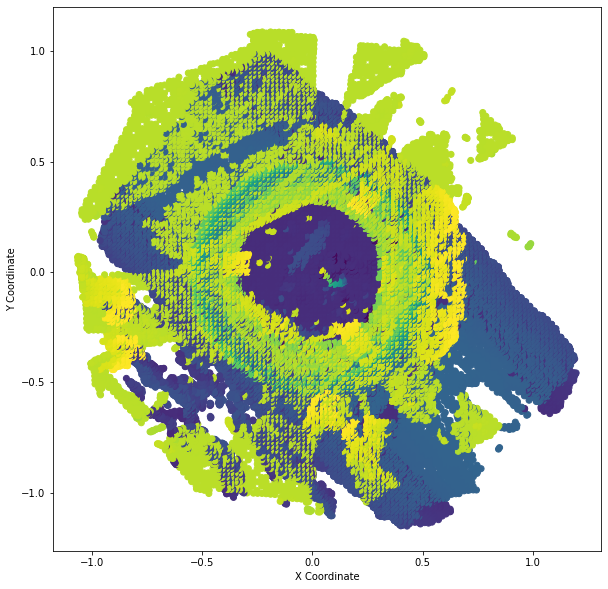

In [40]:
plt.figure(figsize=(10, 10))
plt.scatter(the_pts[:, 0], the_pts[:, 1], c=the_pts[:, 2])
plt.axis("image")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

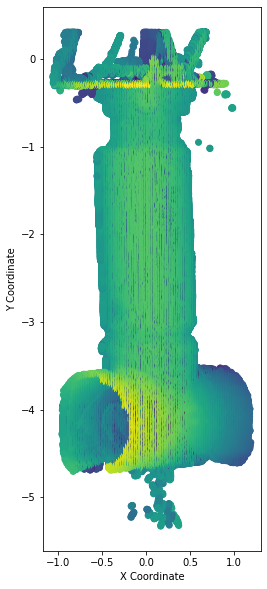

In [41]:
plt.figure(figsize=(10, 10))
plt.scatter(the_pts[:, 0], the_pts[:, 2], c=the_pts[:, 1])
plt.axis("image")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

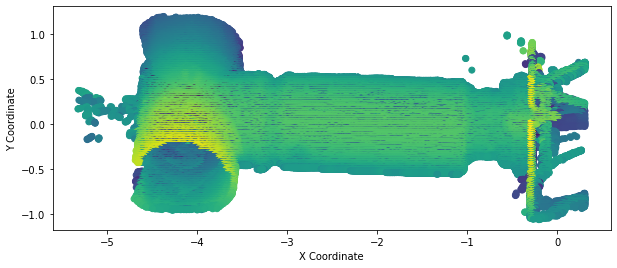

In [42]:
plt.figure(figsize=(10, 10))
plt.scatter(the_pts[:, 2], the_pts[:, 0], c=the_pts[:, 1])
plt.axis("image")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

## Plot mesh in 2D

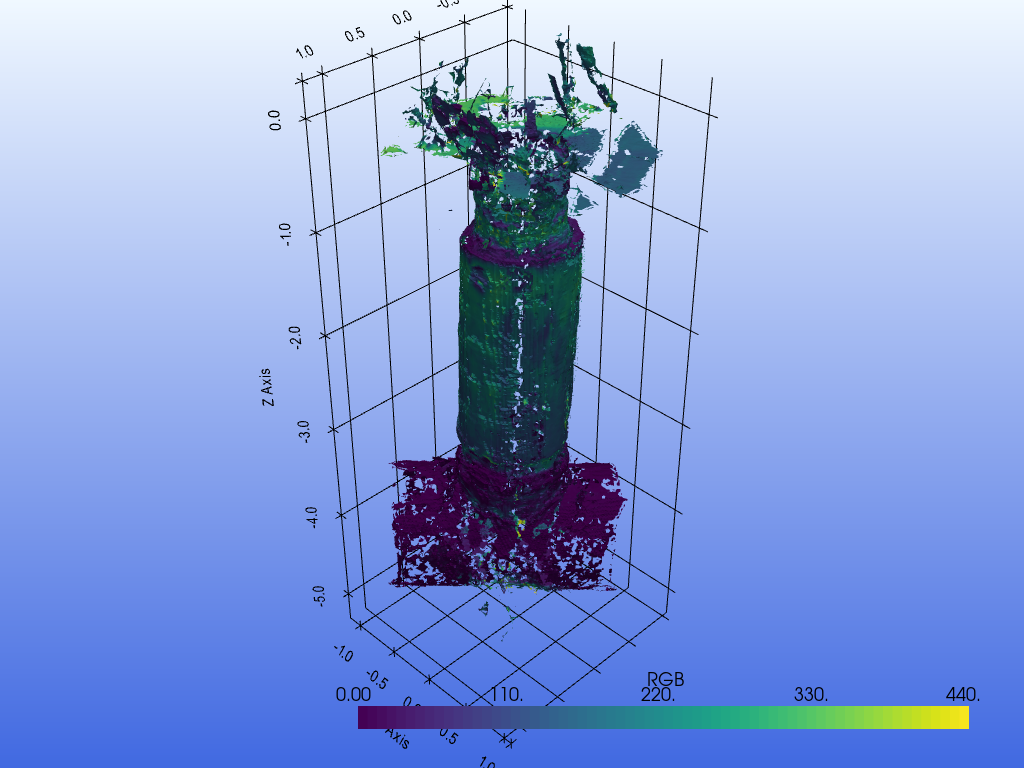

In [155]:
mesh = pv.read('mesh505.ply')
plotter = pv.Plotter()
plotter.add_mesh(mesh)
plotter.show_grid()
# Here we set the gradient
plotter.set_background("royalblue", top="aliceblue")
plotter.show()

## Plot mesh in 2D 

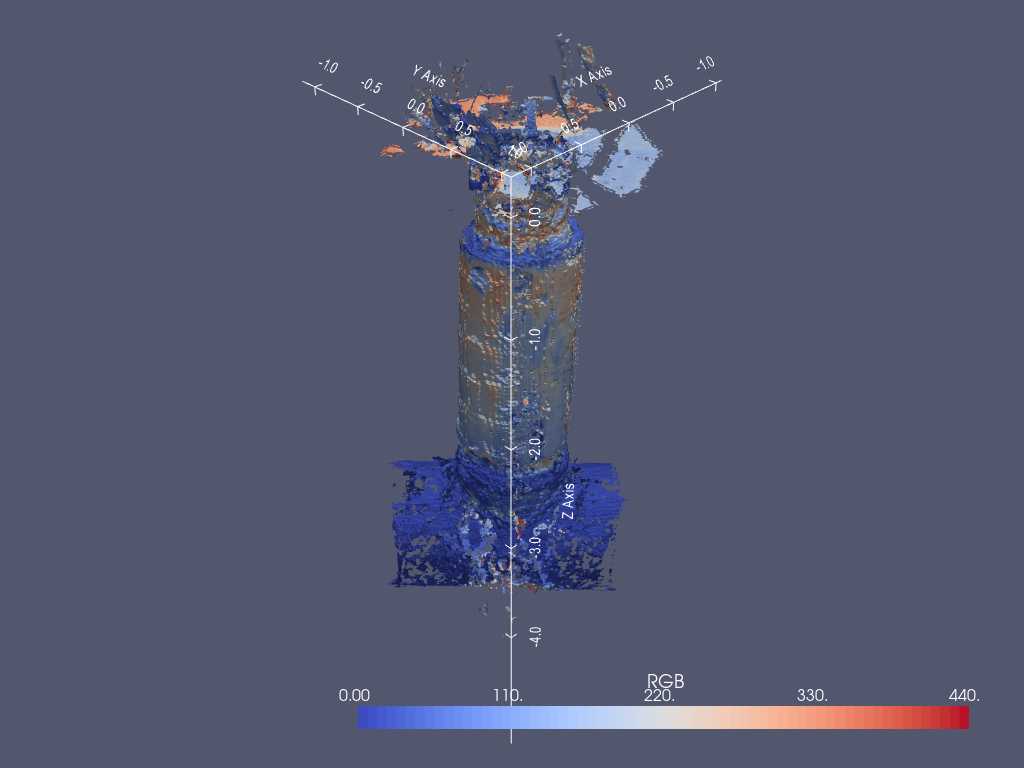

In [106]:
pv.set_plot_theme("ParaView")

mesh = pv.read('mesh505.ply')
mesh.plot(screenshot='sewer', show_bounds=True)

## Slice along x, y and z axis - again if you need to change the theme feel free to do so.

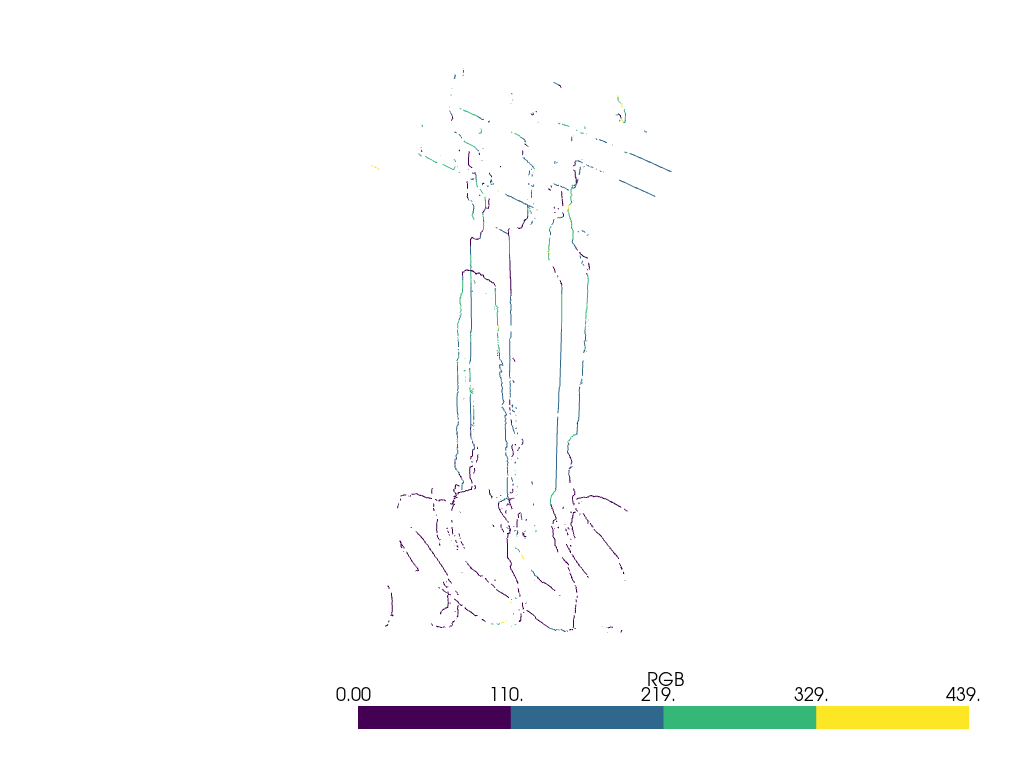

In [111]:
pv.set_plot_theme("document")
mesh = pv.read('mesh505.ply')
slices = mesh.slice_along_axis(n=7, axis="x")
cmap = plt.cm.get_cmap("viridis", 4)
slices.plot(cmap=cmap)

#generate_triangles=True,

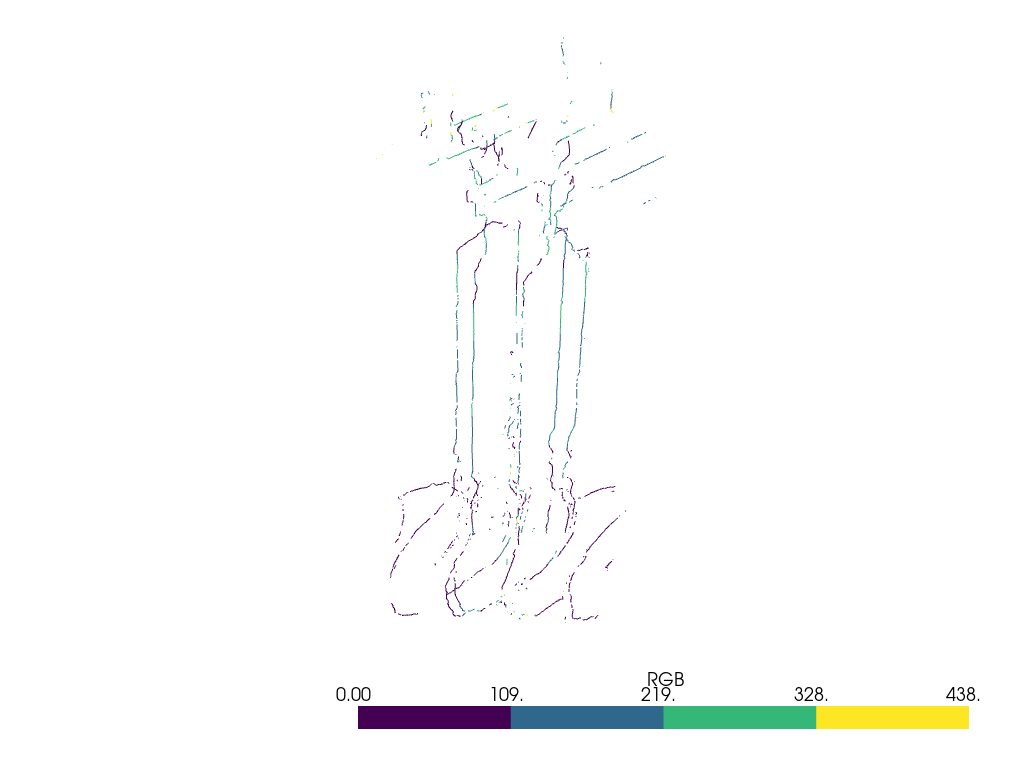

In [112]:
pv.set_plot_theme("document")
mesh = pv.read('mesh505.ply')
slices = mesh.slice_along_axis(n=7, axis="y")
cmap = plt.cm.get_cmap("viridis", 4)
slices.plot(cmap=cmap)

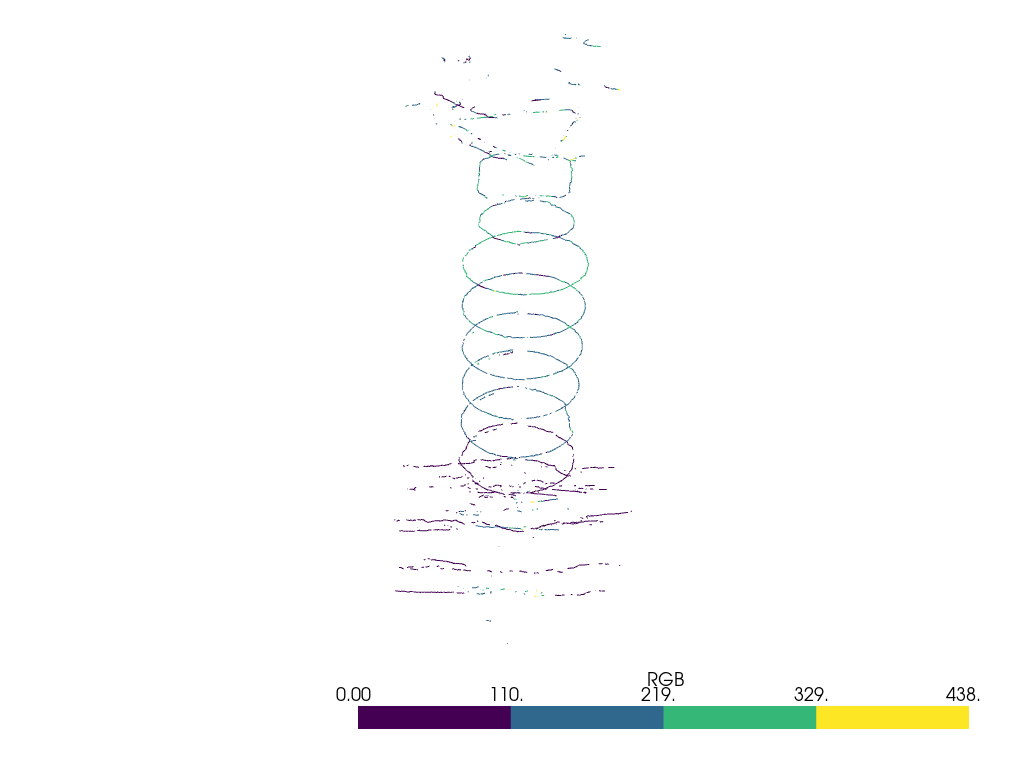

In [197]:
mesh = pv.read('mesh505.ply')
pv.set_plot_theme("document")
slices = mesh.slice_along_axis(n=15, axis="z")
cmap = plt.cm.get_cmap("viridis", 4)
slices.plot(cmap=cmap)


## Original vs Decimated mesh

In [65]:
pv.set_plot_theme("document")

# download mesh
mesh = pv.read('mesh505.ply')

decimated = mesh.decimate_boundary(target_reduction=0.75)

p = pv.Plotter(notebook=0, shape=(1, 2), border=False)
p.subplot(0, 0)
p.add_text("Original mesh", font_size=24)
p.add_mesh(mesh, show_edges=True, color=True)
p.subplot(0, 1)
p.add_text("Decimated version", font_size=24)
p.add_mesh(decimated, color=True, show_edges=True)

p.link_views()  # link all the views
# Set a camera position to all linked views
p.camera_position = [(15, 5, 0), (0, 0, 0), (0, 1, 0)]

p.show(auto_close=False)
p.open_gif("linked.gif")

# Update camera and write a frame for each updated position
nframe = 15
for i in range(nframe):
    p.camera_position = [
        (15 * np.cos(i * np.pi / 45.0), 5.0, 15 * np.sin(i * np.pi / 45.0)),
        (0, 0, 0),
        (0, 1, 0),
    ]
    p.write_frame()

# Close movie and delete object
p.close()

## Plot Over Line

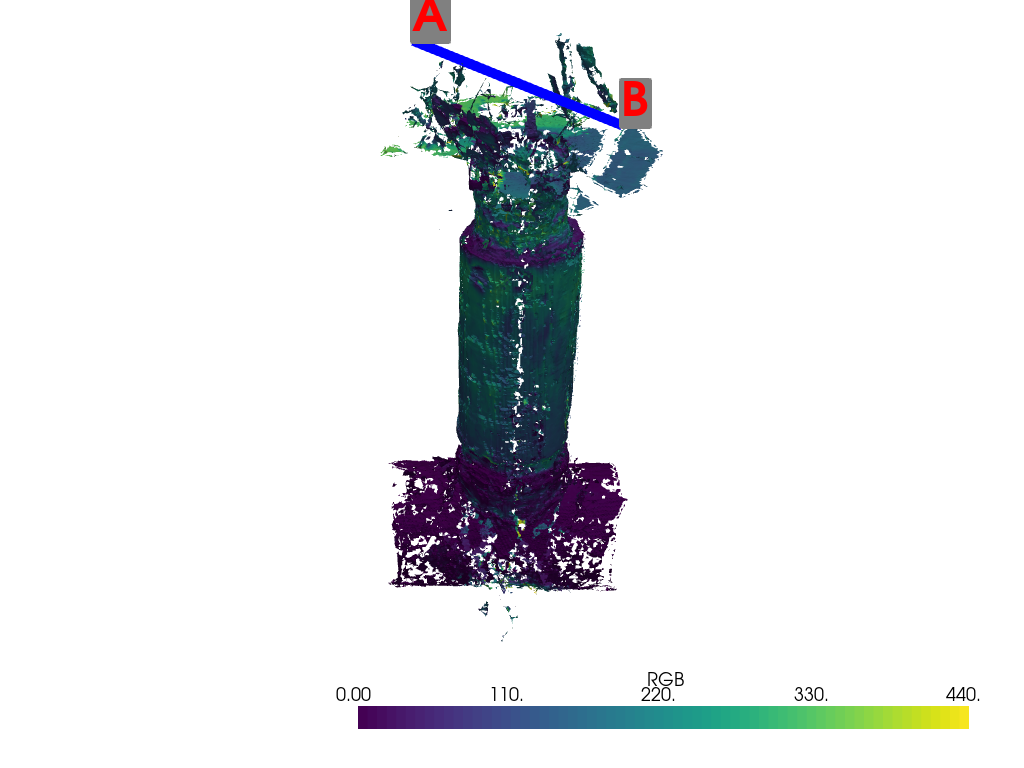

In [114]:
mesh = pv.read('mesh505.ply')
# Make two points to construct the line between
a = [mesh.center[0], mesh.bounds[2], mesh.bounds[5]]
b = [mesh.center[0], mesh.bounds[3], mesh.bounds[5]]

# Preview how this line intersects this mesh
line = pv.Line(a, b)

p = pv.Plotter()
p.add_mesh(mesh)
p.add_mesh(line, color="b", line_width=10)
p.add_point_labels(
    [a, b], ["A", "B"], font_size=48, point_color="red", text_color="red"
)
p.show()

## Widgets 

### Box Widget

In [53]:
mesh = pv.read('mesh505.ply')
p = pv.Plotter(notebook=False)
p.add_mesh_clip_box(mesh, color='white')
p.show()
p.close()

### Plane Widget

In [54]:
vol = pv.read('mesh505.ply')

p = pv.Plotter(notebook=False)
p.add_mesh_clip_plane(vol)
p.show()
p.close()


### Plane Widget with slice

In [60]:
p = pv.Plotter(notebook=False)
p.add_mesh_slice(vol)
p.show()
p.close()

In [58]:
mesh = pv.read('mesh505.ply')

p = pv.Plotter(notebook=False)
p.add_mesh(mesh.contour(8).extract_largest(), opacity=0.5)

def my_plane_func(normal, origin):
    slc = mesh.slice(normal=normal, origin=origin)
    arrows = slc.glyph(orient='vectors', scale="scalars", factor=0.01)
    p.add_mesh(arrows, name='arrows')

p.add_plane_widget(my_plane_func)
p.show_grid()
p.add_axes()
p.show()
p.close()

  File "<ipython-input-58-5f66dbe23593>", line 8, in my_plane_func
    arrows = slc.glyph(orient='vectors', scale="scalars", factor=0.01)
  File "C:\Users\Personal\anaconda3\lib\site-packages\pyvista\core\filters.py", line 1125, in glyph
    dataset.active_scalars_name = scale
  File "C:\Users\Personal\anaconda3\lib\site-packages\pyvista\core\common.py", line 344, in active_scalars_name
    self.set_active_scalars(name)
  File "C:\Users\Personal\anaconda3\lib\site-packages\pyvista\core\common.py", line 505, in set_active_scalars
    raise ValueError('Data field ({}) not usable'.format(field))
ValueError: Data field (None) not usable


### Slider Bar Widget

In [57]:
mesh = pv.read('mesh505.ply')

p = pv.Plotter(notebook=False)
p.add_mesh_threshold(mesh)
p.show()
p.close()

## Plot cell centers

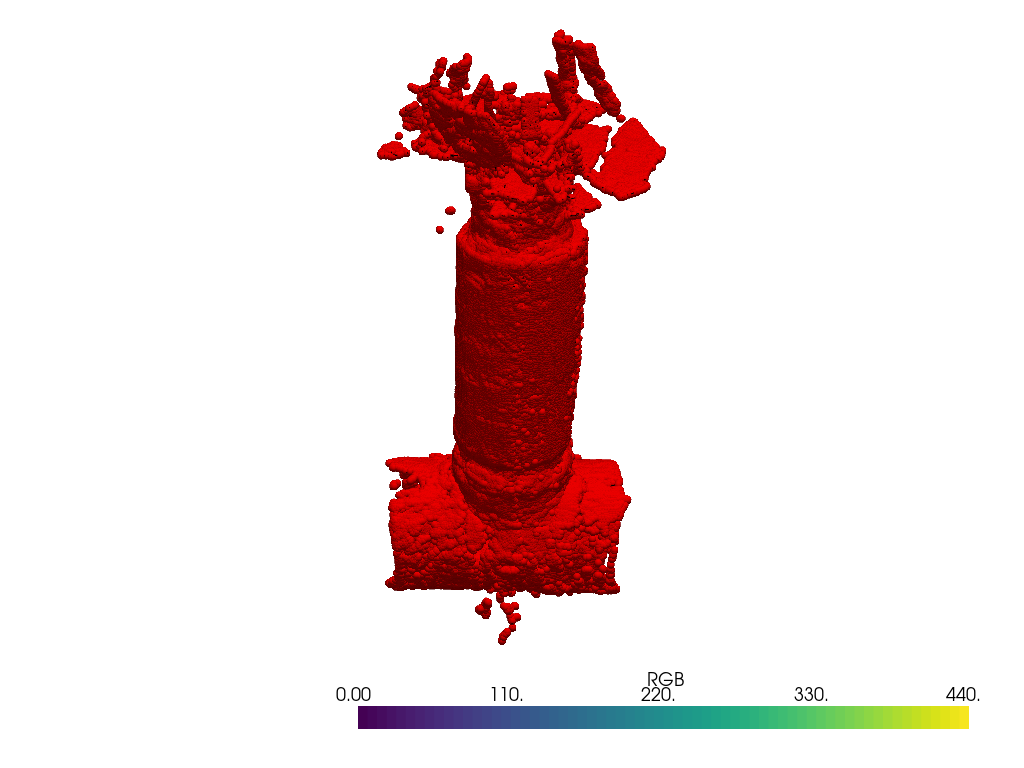

In [126]:
centers = mesh.cell_centers()

p = pv.Plotter()
p.add_mesh(mesh, show_edges=True, line_width=1)
p.add_mesh(centers, color="r", point_size=8.0, render_points_as_spheres=True)
p.show()

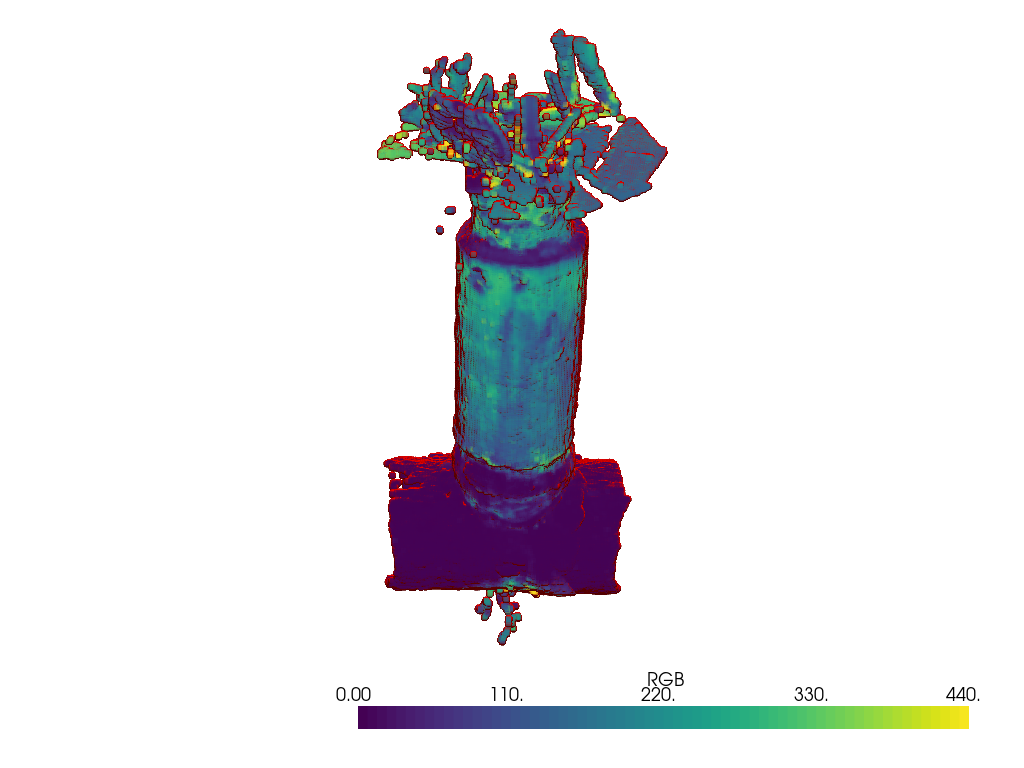

In [201]:
grid = pv.read('2020-08-14_09_51_45.020_505_quick.ply')

centers = grid.cell_centers()

p = pv.Plotter()
p.add_mesh(grid, show_edges=True, opacity=0.5, line_width=1)
p.add_mesh(centers, color="r", point_size=8.0, render_points_as_spheres=True)
p.show()


## Volume

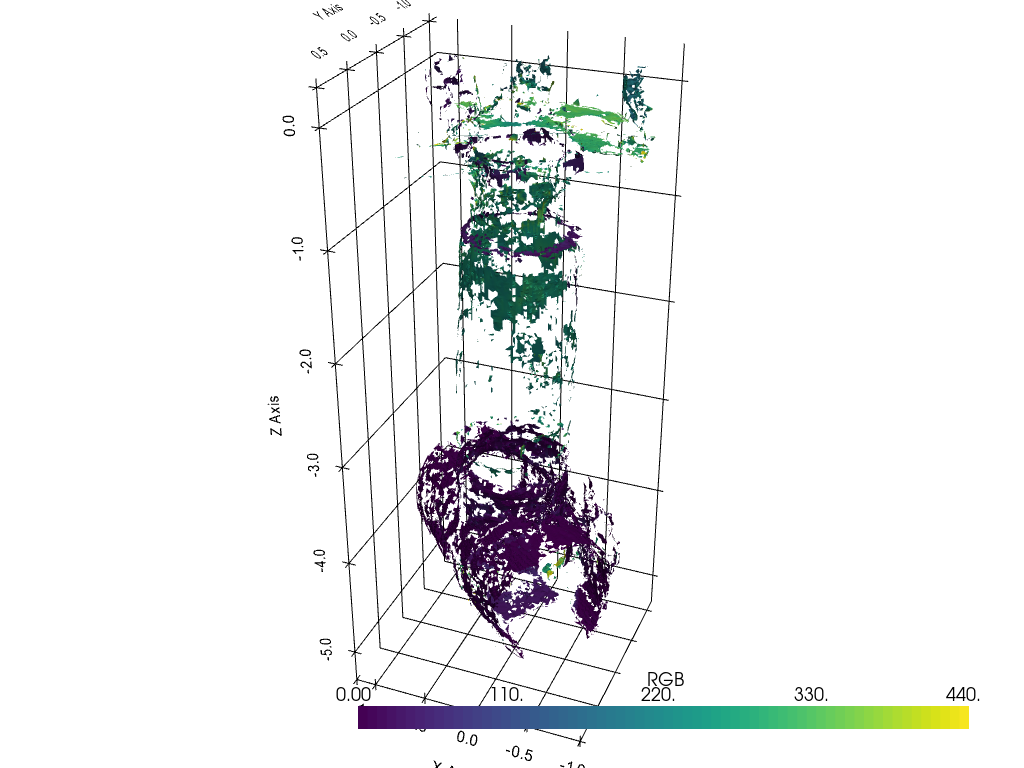

In [127]:
dataset = pv.read('mesh505.ply')

sized = dataset.compute_cell_sizes()

# Grab volumes for all cells in the mesh
cell_volumes = sized.cell_arrays["Volume"]

volume = dataset.volume
threshed = dataset.threshold_percent([0.15, 0.50], invert=True)
threshed.plot(show_grid=True, cpos=[-2, 5, 3])


## Contour

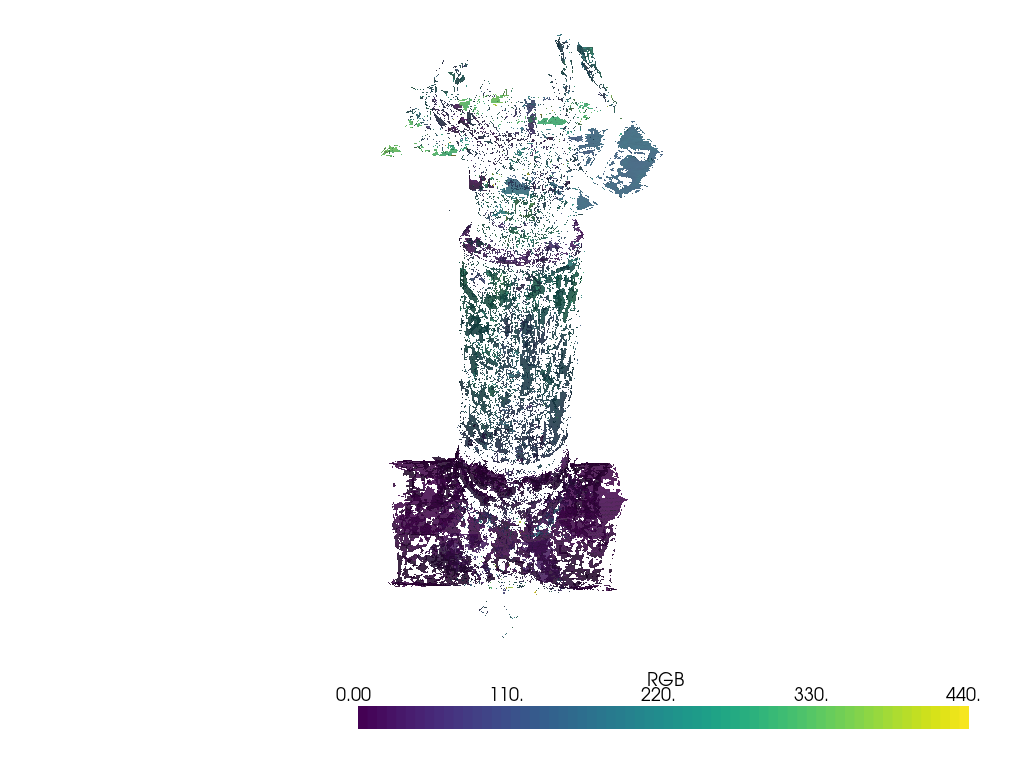

In [129]:
mesh = pv.read('mesh505.ply')

contours = mesh.contour()

p = pv.Plotter()
p.add_mesh(mesh, opacity=0.85)
p.add_mesh(contours, color="white", line_width=5)
p.show()


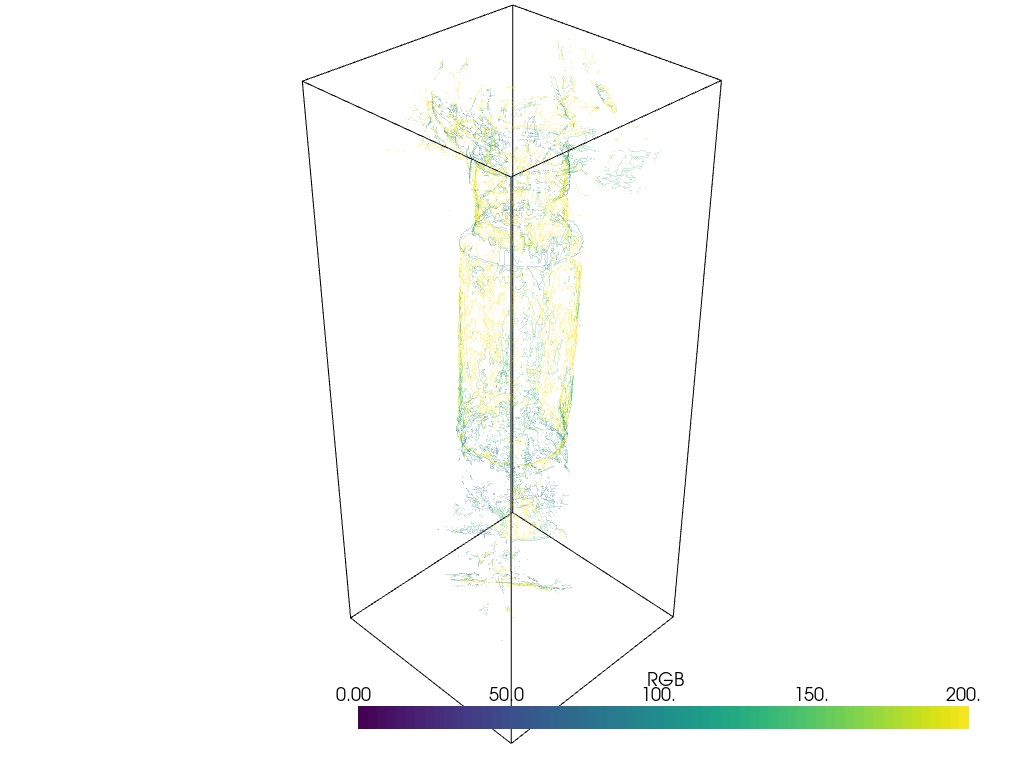

In [130]:
mesh = pv.read('mesh505.ply')

contours = mesh.contour(np.linspace(50, 200, 5))

p = pv.Plotter()
p.add_mesh(mesh.outline(), color="k")
p.add_mesh(contours, opacity=0.25, clim=[0, 200])

p.show()


## Edges

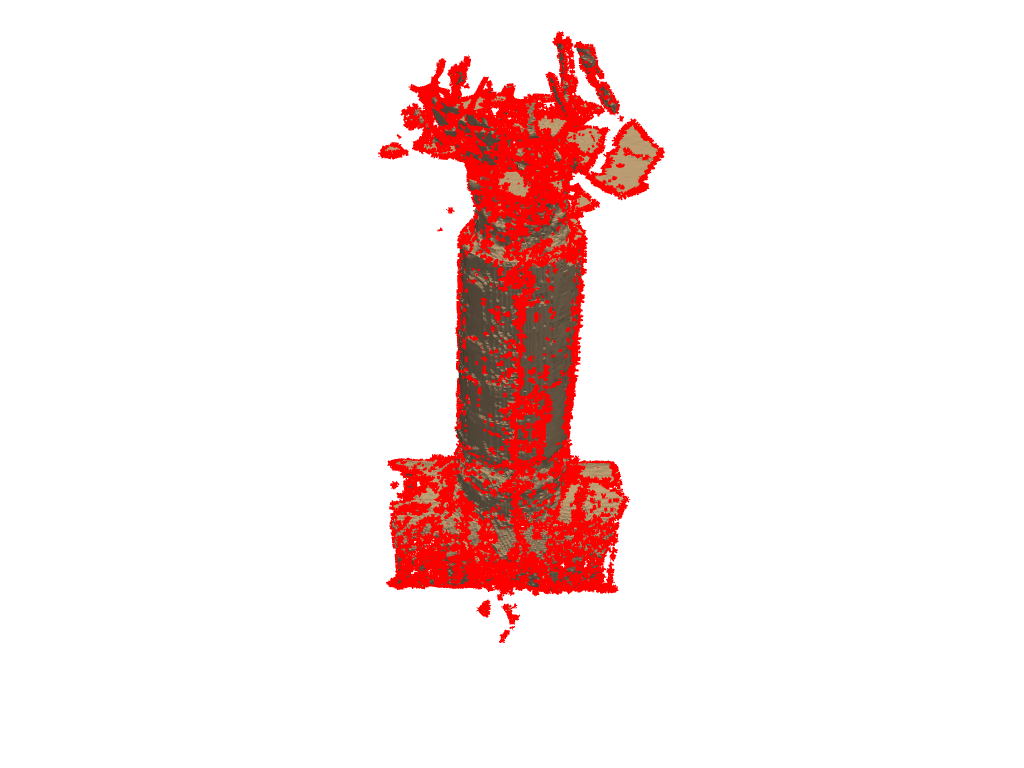

In [131]:
mesh = pv.read('mesh505.ply')

edges = mesh.extract_feature_edges(80)

p = pv.Plotter()
p.add_mesh(mesh, color=True)
p.add_mesh(edges, color="red", line_width=5)

p.show()

## Slices

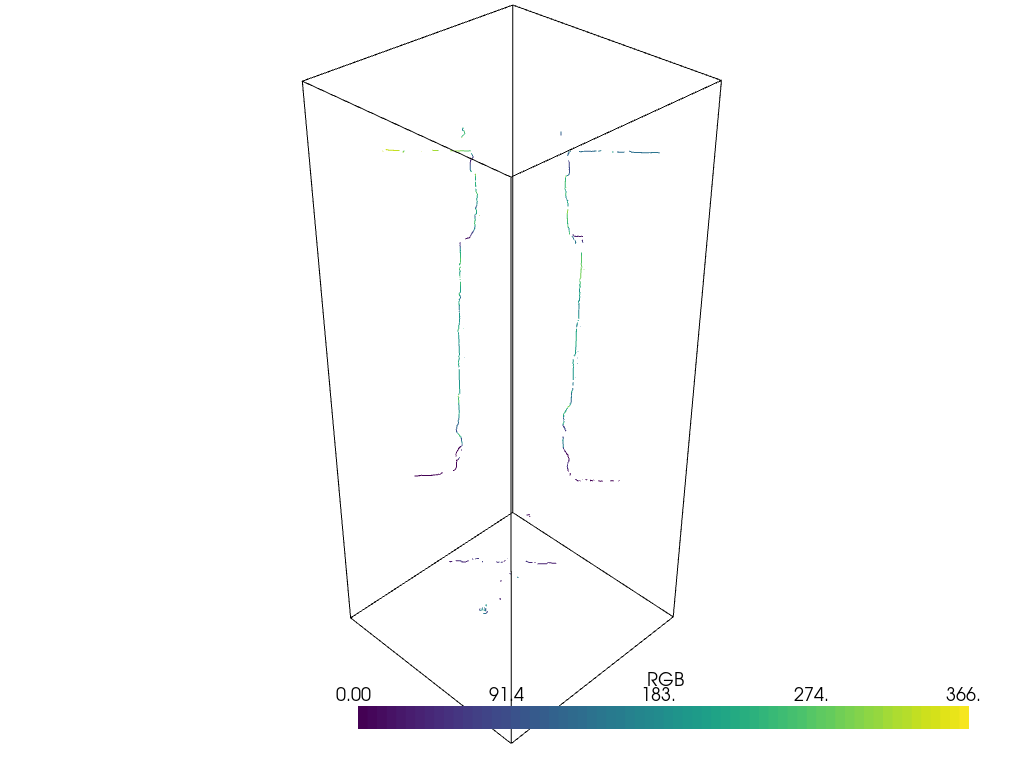

In [132]:
single_slice = mesh.slice(normal=[1, 1, 0])

p = pv.Plotter()
p.add_mesh(mesh.outline(), color="k")
p.add_mesh(single_slice)
p.show()


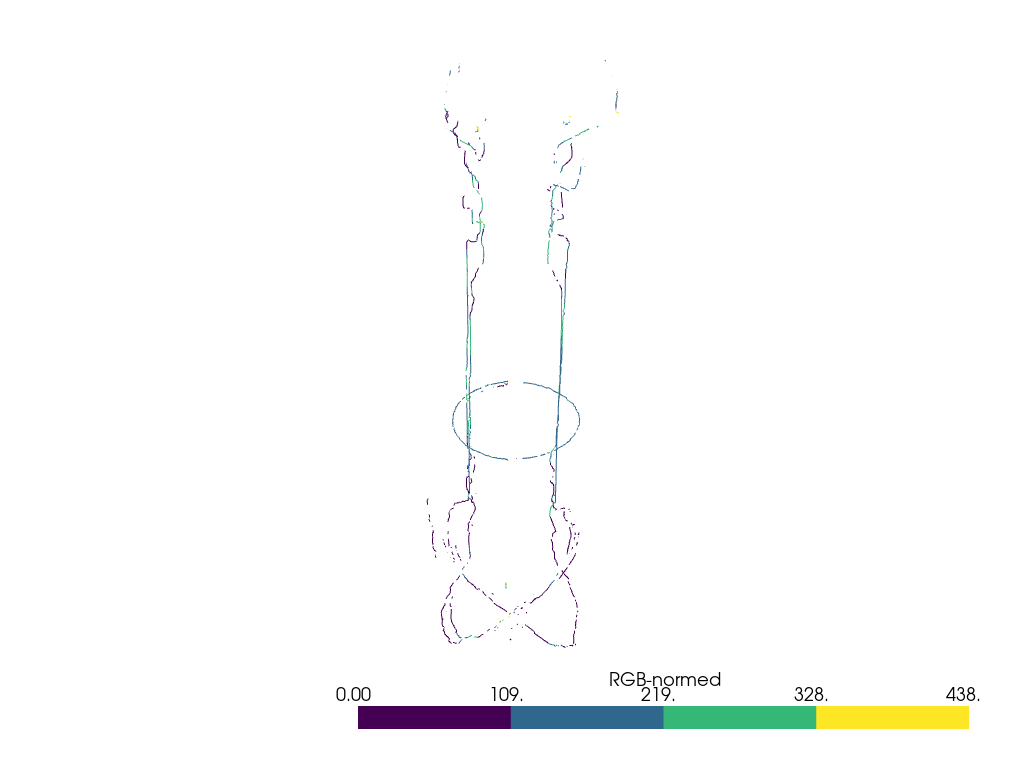

In [140]:
slices = mesh.slice_orthogonal()

slices.plot(cmap=cmap)

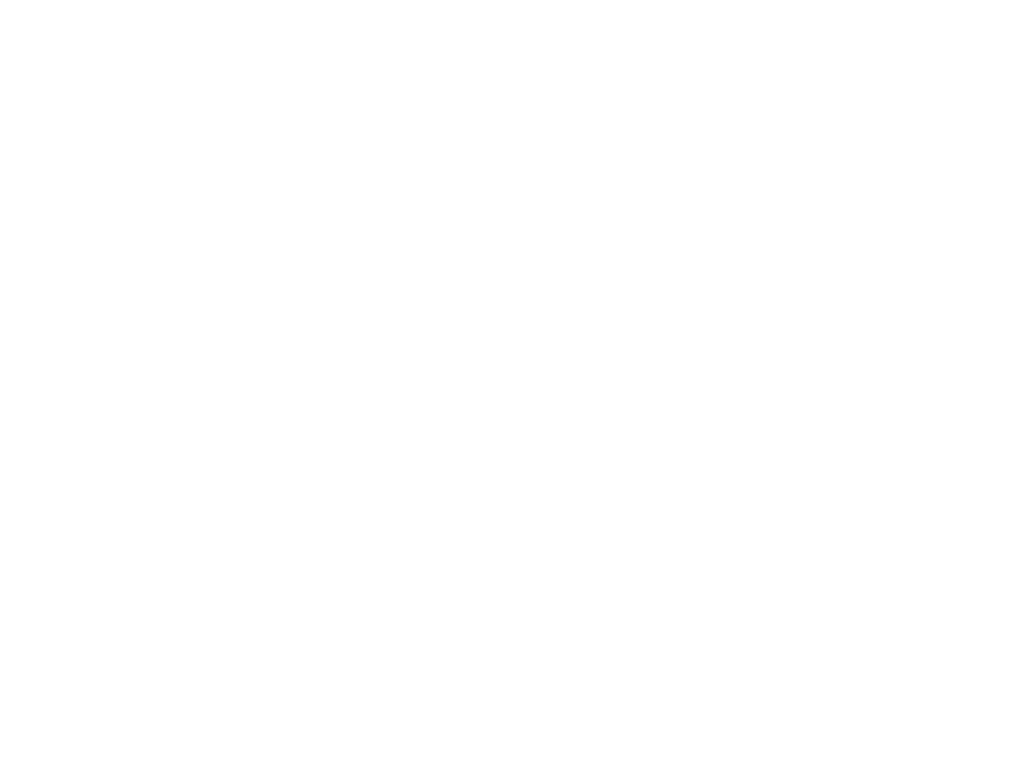

In [141]:
slices = mesh.slice_orthogonal(x=20, y=20, z=30)
slices.plot(cmap=cmap)

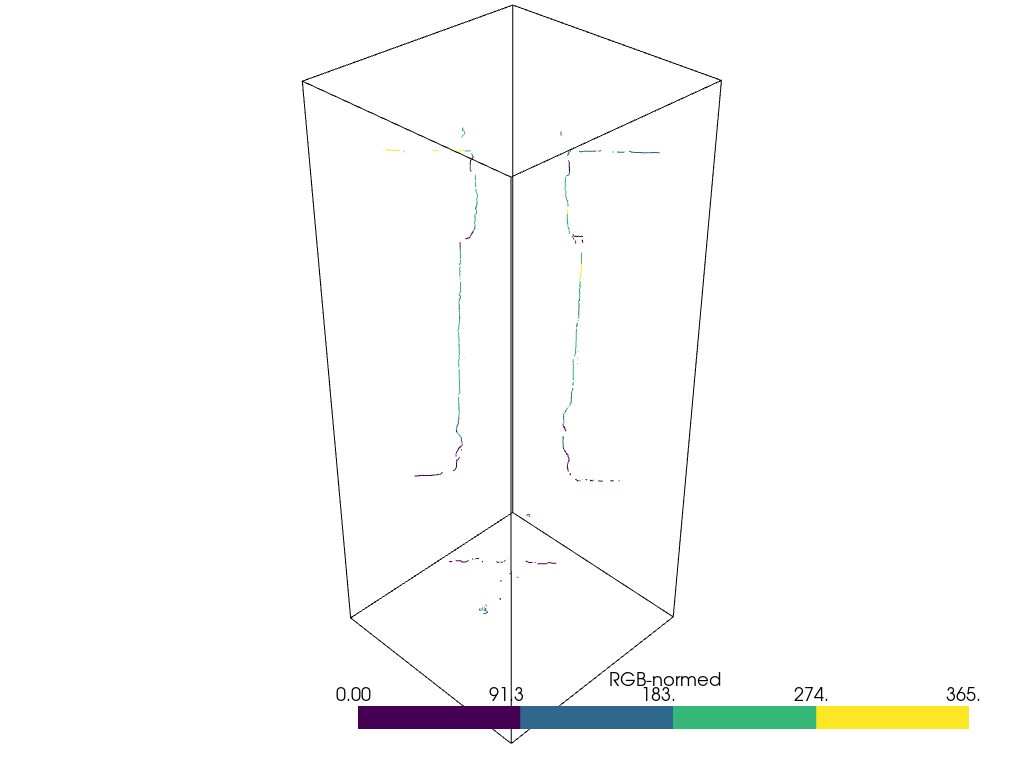

In [142]:
single_slice = mesh.slice(normal=[1, 1, 0])

p = pv.Plotter()
p.add_mesh(mesh.outline(), color="k")
p.add_mesh(single_slice, cmap=cmap)
p.show()

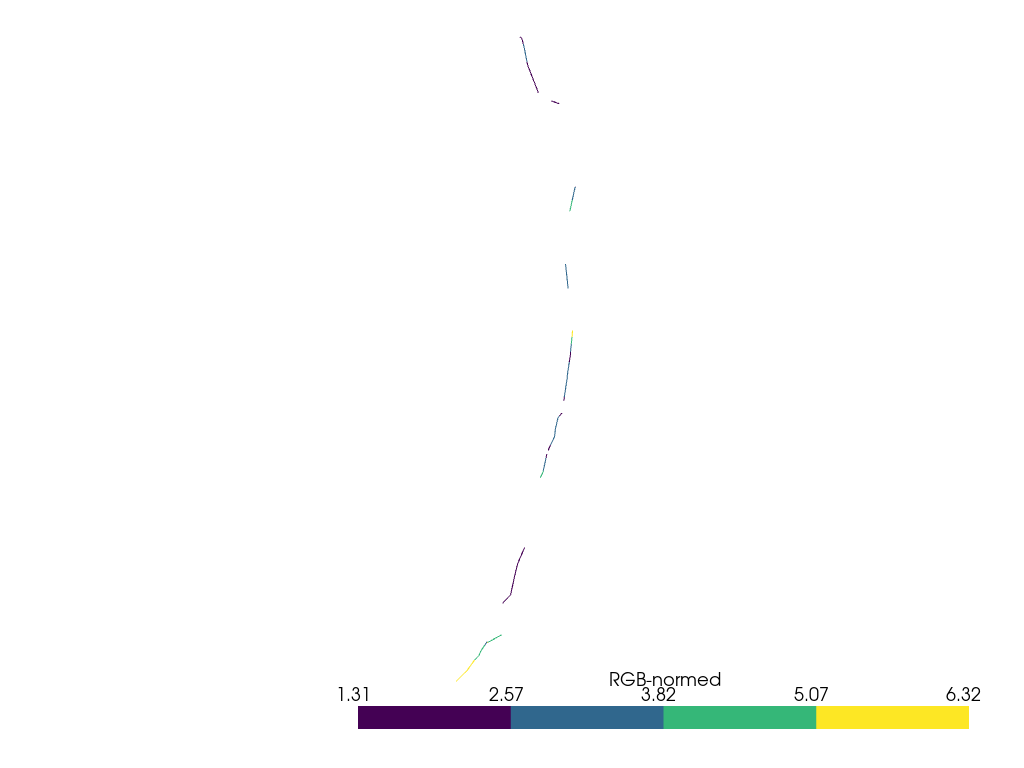

In [143]:
slices = mesh.slice_along_axis(n=1, axis="y")

slices.plot(cmap=cmap)

## Clipping

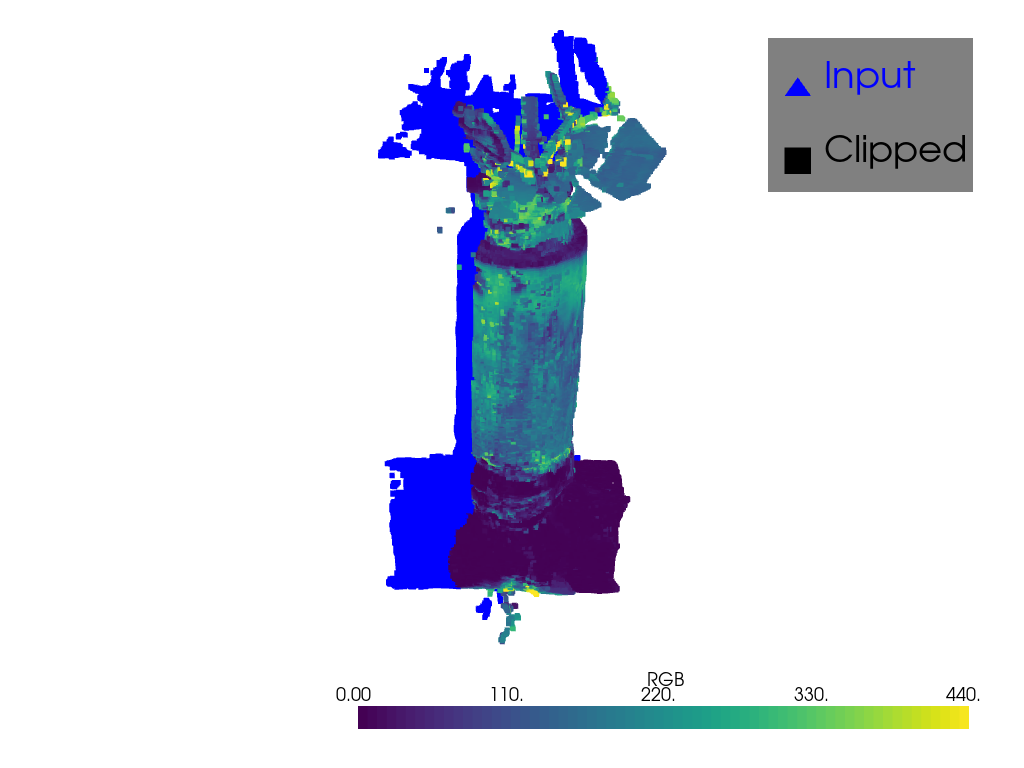

In [203]:
dataset = pv.read('2020-08-14_09_51_45.020_505_quick.ply')
clipped = dataset.clip('y', invert=False)

p = pv.Plotter()
p.add_mesh(dataset, style='wireframe', color='blue', label='Input')
p.add_mesh(clipped, label='Clipped')
p.add_legend()
# p.camera_position = [(0.24, 0.32, 0.7),
#                      (0.02, 0.03, -0.02),
#                      (-0.12, 0.93, -0.34)]
p.show()
